In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ProjectMajor/NewAge/datasets

/content/drive/MyDrive/ProjectMajor/NewAge/datasets


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saraswatvinay","key":"d2181a2c498a2f85d16781f2e6389580"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # to change permissions
!rm kaggle.json

In [ ]:
!kaggle datasets download -d vinaysaraswat/age-detection

Dataset URL: https://www.kaggle.com/datasets/vinaysaraswat/age-detection
License(s): unknown
age-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip age-detection.zip

Archive:  age-detection.zip
UTKFace/100_0_0_20170112213500903.jpg.chip.jpg exists and is a symbolic link with no real file.
replace UTKFace/100_0_0_20170112213500903.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
# os.chdir(r'/content/drive/MyDrive/ProjectMajor/NewAge/datasets/UTKFace')
os.chdir(r'/content/drive/MyDrive/ProjectMajor/Age_Detection/Dataset/utkface_aligned_cropped/UTKFace')

In [ ]:
onlyfiles = os.listdir()
len(onlyfiles)

In [ ]:
from random import shuffle
shuffle(onlyfiles)
age = [i.split('_')[0] for i in onlyfiles]

In [ ]:
classes = []
for i in age:
  i = int(i)
  if isinstance(i, str):
    continue  # Skip non-numeric values
  if (i>=1) and (i<=2):
    classes.append(0)
  if (i>=3) and (i<=9):
    classes.append(1)
  if (i>=10) and (i<=20):
    classes.append(2)
  if (i>=21) and (i<=27):
    classes.append(3)
  if (i>=28) and (i<=45):
    classes.append(4)
  if (i>=46) and (i<=65):
    classes.append(5)
  if i>65:
    classes.append(6)

In [ ]:
!pip install --upgrade opencv-python

In [ ]:
from scipy import misc
import cv2
X_data =[]
for file in onlyfiles:
    face = cv2.imread(file)
    face =cv2.resize(face, (256, 256, 1) )
    X_data.append(face)

In [ ]:
import numpy as np
X = np.squeeze(X_data)
X.shape

(4953, 256, 256, 3)

In [ ]:
X = X.astype('float32')
X /= 255

In [ ]:
from tensorflow.keras.utils import to_categorical
categorical_labels = to_categorical(classes, num_classes=5)

In [ ]:
(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels[:15008]) , (X[15008:] , categorical_labels[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])

In [ ]:
import cv2
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.layers import Input

input = Input(shape = (256,256,1))

conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

flatten = Flatten()(pool4)

dense_1 = Dense(128,activation='relu')(flatten)

drop_1 = Dropout(0.2)(dense_1)

output = Dense(3,activation="sigmoid")(drop_1)



# import tensorflow as tf
# model = tf.keras.Sequential()

# # Must define the input shape in the first layer of the neural network
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(256,256,1)))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Dropout(0.3))

# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Dropout(0.3))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(5, activation='softmax'))

# # Take a look at the model summary
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 32)        0

In [ ]:
# Compile the model
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
import keras.callbacks

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.save('/content/drive/MyDrive/ProjectMajor/Age_Detection/Dataset/output/new_Age_genderdetection_.h5')
# model.save('/content/drive/MyDrive/ProjectMajor/NewAge/datasets/output/newage.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
fle_s='./output/newage.h5'
checkpointer = keras.callbacks.ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:
history = model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=35,
         validation_data=(x_valid, y_valid),)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 10.0)
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer

In [ ]:
def plot_accuracy(history):
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']
    plt.plot(training_accuracy,'r',linewidth=3.0)
    plt.plot(validation_accuracy,'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

def plot_loss(history):

  training_loss = history.history['loss']
  validation_loss = history.history['val_loss']
  plt.plot(training_loss,'m',linewidth=3.0)
  plt.plot(validation_loss,'c',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)
  plt.show()

In [ ]:
plot_accuracy(history)

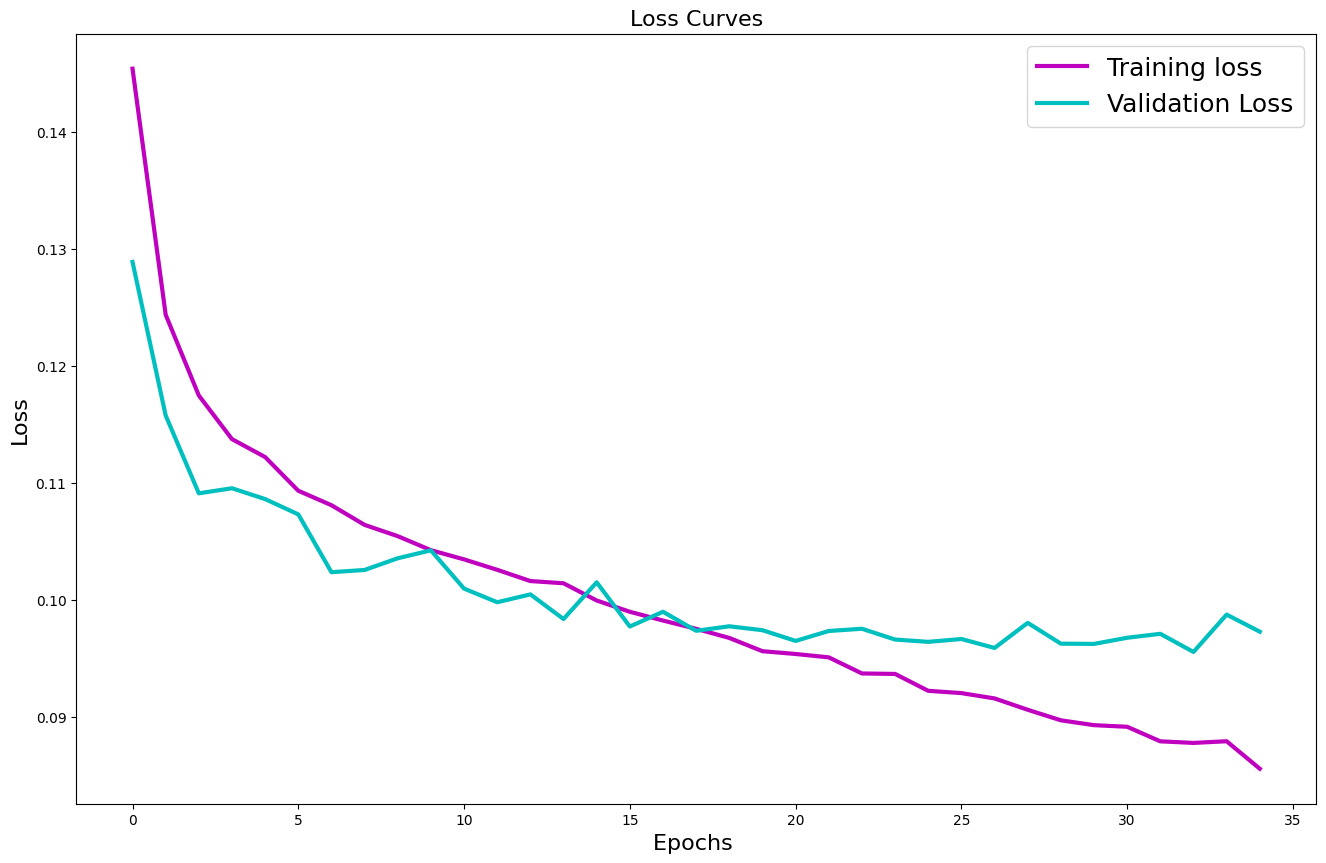

In [ ]:
plot_loss(history)

In [ ]:
model.save('umaar.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('/content/drive/MyDrive/ProjectMajor/Age_Detection/models/Age_gender_detection.h5')


In [ ]:
model.save('/content/drive/MyDrive/ProjectMajor/Age_Detection/Dataset/output/Age_gender_detection.h5')

In [ ]:
model.save('my_model.keras')

In [ ]:
model.save(f"C:/Users/ASUS/Desktop/output/Age_gender_detection", save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


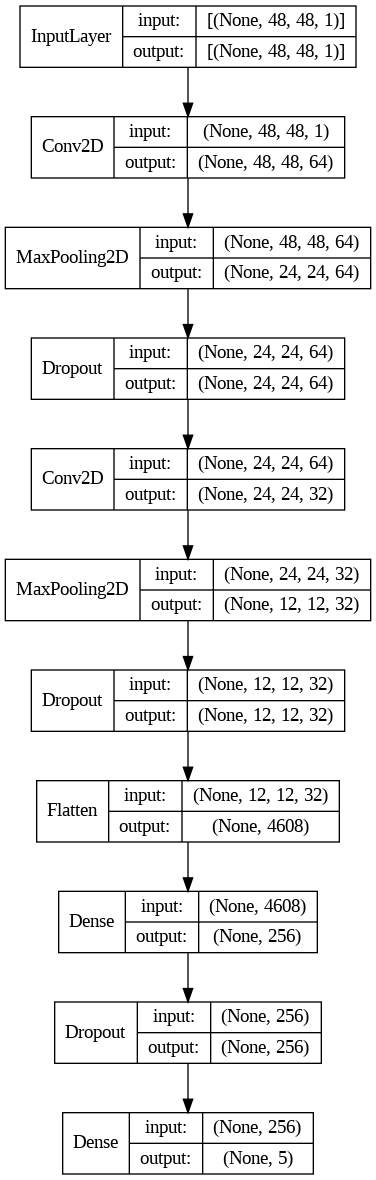

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import plot_model
plot_model(model, to_file='model_flowchart.png', show_shapes=True, show_layer_names=False)

In [ ]:
from IPython.display import FileLink

FileLink('model_flowchart.png')

/content/model_flowchart.png

In [ ]:
import shutil

# Define the path to the generated file
file_path = 'model_flowchart.png'

# Define the destination path where you want to save the file
destination_path = './'

# Copy the file to the destination folder
shutil.copy(file_path, destination_path)

print(f"File downloaded to: {destination_path}")


SameFileError: 'model_flowchart.png' and './model_flowchart.png' are the same file